# Explorando los datos


In [2]:
#imports
import pathlib
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

#data1 = pd.read_csv(f"{RUTA}/data/Fraudulent_E-Commerce_Transaction_Data.csv")
#data1.shape
data2 = pd.read_csv(f"{RUTA}/data/FraudulentECoomerce4.csv", encoding='latin1', sep=',', on_bad_lines='skip')
data2.shape

(499976, 22)

## Previsualizando datos


In [3]:
data2.head(2)

,Amount,Errors,Is_Fraud,Gender,Direccion,Ciudad,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,...,Day,Dia_Semana,Time,BancoCredito,TipoTarjeta,LimiteCredito,Merchant_Name,Merchant_City,Merchant_State,Zip
0,4522,SIN ERROR,0,Female,462 Rose Lane,La Verne,29278,59696,127613,787,...,18,Sábado,06:28:00.0000000,Visa,Credit,12400,-727612092139916043,Monterey Park,CA,917540
1,14000,SIN ERROR,0,Female,462 Rose Lane,La Verne,29278,59696,127613,787,...,19,Sábado,06:27:00.0000000,Visa,Debit,21968,-4282466774399734331,Mira Loma,CA,917520


In [6]:
data2.head(2)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0


In [28]:
data1['Address_ok'] = (data1['Shipping Address'] == data1['Billing Address']).astype(int)

In [7]:
data = [data1, data2] 

In [8]:
# Visualizamos información
for df in data:
    print(df.info())
    print(f"##################################")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [9]:
# Visualizamos nulos
for df in data:
    print(df.isnull().sum())
    print(f"##################################")

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64
##################################
Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64
##################################


In [10]:
# Visualizamos nulos
for df in data:
    print(df.select_dtypes(include='number').columns)#object
    print(f"##################################")

# Visualizamos nulos
for df in data:
    print(df.select_dtypes(include='object').columns)#object
    print(f"##################################")

Index(['Transaction Amount', 'Quantity', 'Customer Age', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')
##################################
Index(['Transaction Amount', 'Quantity', 'Customer Age', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')
##################################
Index(['Transaction ID', 'Customer ID', 'Transaction Date', 'Payment Method',
       'Product Category', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address'],
      dtype='object')
##################################
Index(['Transaction ID', 'Customer ID', 'Transaction Date', 'Payment Method',
       'Product Category', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address'],
      dtype='object')
##################################


In [11]:
columnas_numericas = data1.select_dtypes(include='number').columns
print("Columnas numéricas:", columnas_numericas)

# Ensure that numeric_columns is a DataFrame


if isinstance(columnas_numericas, pd.DataFrame):
    cor = columnas_numericas.corr()
    print(cor)
else:
    print("columnas_numericas is not a DataFrame")

Columnas numéricas: Index(['Transaction Amount', 'Quantity', 'Customer Age', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')
columnas_numericas is not a DataFrame


In [26]:
# Assuming df is your original DataFrame and columnas_numericas is an Index object
df_numeric = data1[columnas_numericas]

# Now you can calculate the correlation
cor = df_numeric.corr()
print(cor)

                    Transaction Amount  Quantity  Customer Age  Is Fraudulent  \
Transaction Amount            1.000000  0.008426     -0.008015       0.275459   
Quantity                      0.008426  1.000000     -0.000445      -0.005340   
Customer Age                 -0.008015 -0.000445      1.000000       0.004819   
Is Fraudulent                 0.275459 -0.005340      0.004819       1.000000   
Account Age Days             -0.044580 -0.004549     -0.012201      -0.142467   
Transaction Hour             -0.028962  0.004059      0.003518      -0.122226   

                    Account Age Days  Transaction Hour  
Transaction Amount         -0.044580         -0.028962  
Quantity                   -0.004549          0.004059  
Customer Age               -0.012201          0.003518  
Is Fraudulent              -0.142467         -0.122226  
Account Age Days            1.000000          0.024355  
Transaction Hour            0.024355          1.000000  


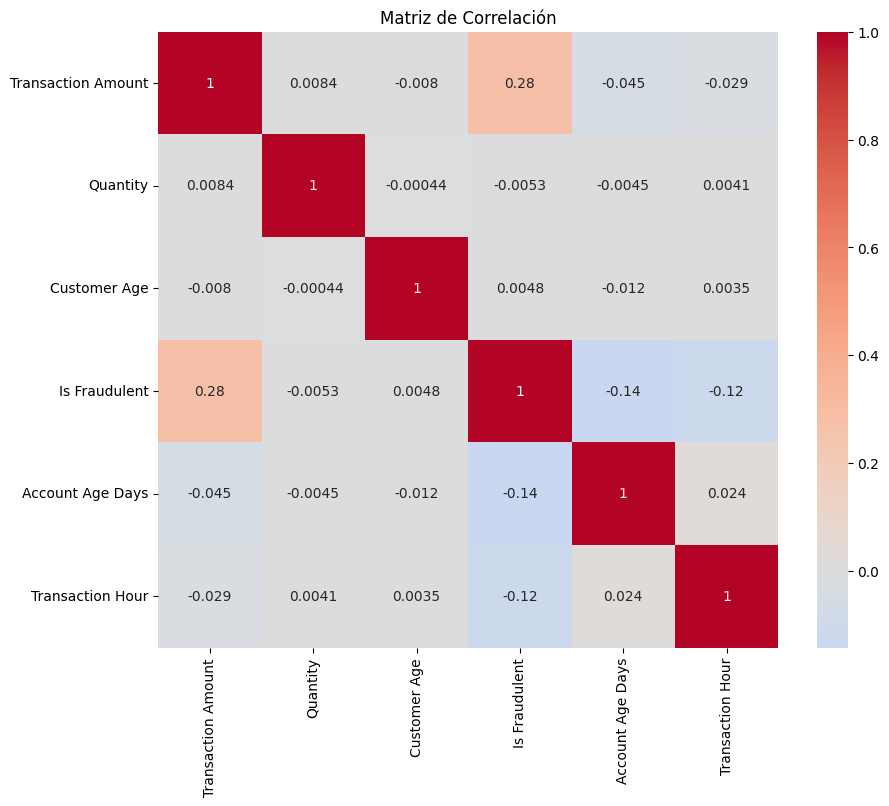

In [27]:
# Graficar la matriz de correlación usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

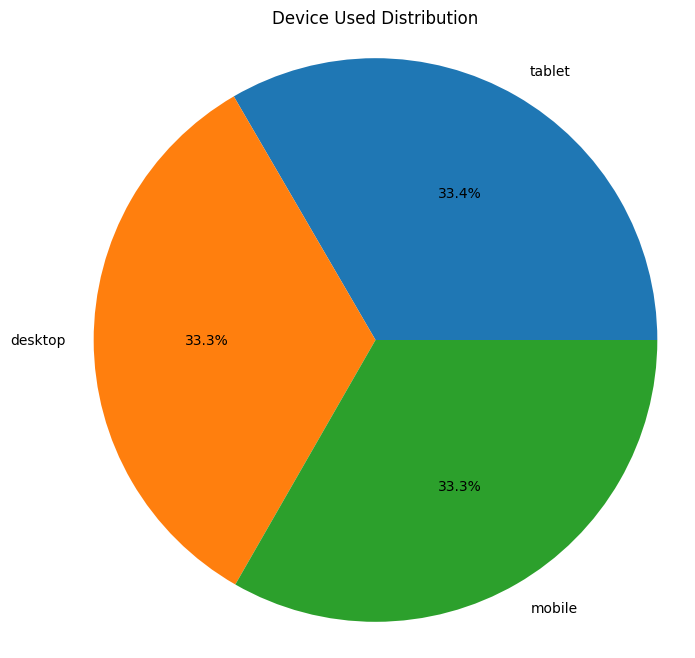

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(data1['Device Used'].value_counts(), labels=data1['Device Used'].unique(), autopct='%1.1f%%')
plt.title('Device Used Distribution')
plt.axis('equal')
plt.show()

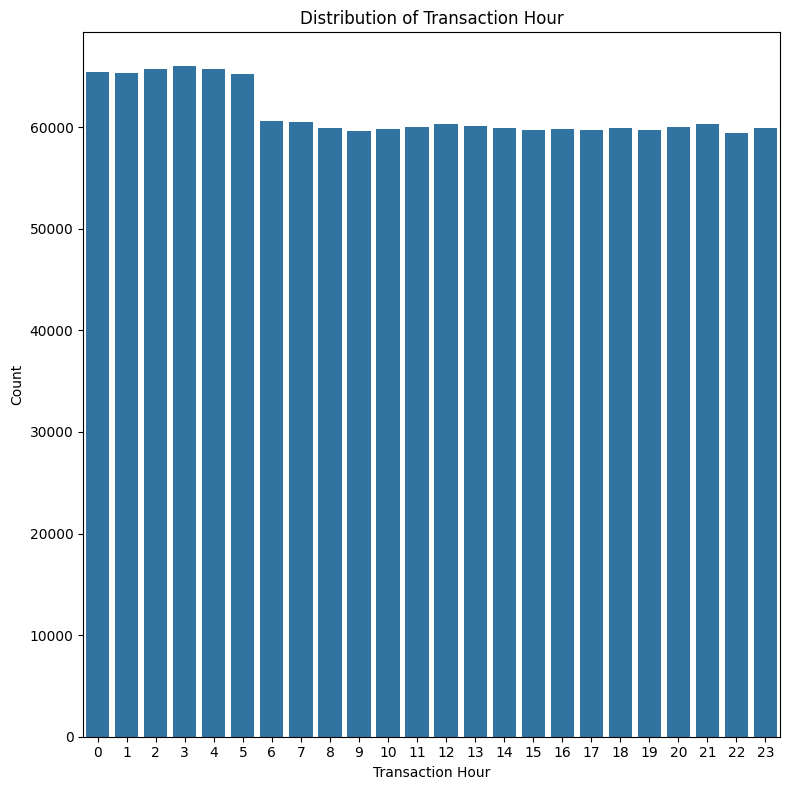

In [21]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Transaction Hour', data=data1)
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.title('Distribution of Transaction Hour')
plt.tight_layout()
plt.show()

In [15]:
#data1.isnull().sum()

#data1.info()
#data1.describe().T
#data1.duplicated().sum()
#data1.select_dtypes(include='number').columns


#data2.isnull().sum()

#data2.info()
#data2.describe().T
#data2.duplicated().sum()